In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## Problem Statement

- Ride cancellations and “no driver found” bookings hurt both revenue and customer trust. 

- In this project, I use NCR ride booking data to predict whether a trip will be completed or fail (customer cancel, driver cancel, no driver found, or incomplete) based on factors like time, pickup/drop area, vehicle type, and payment method. 

- The goal is to spot the patterns behind failed bookings and suggest practical ways to improve trip completion rates.

In [79]:
df = pd.read_csv("ncr_ride_bookings.csv")

In [80]:
pd.set_option("display.max_columns", None)

df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [81]:
df.tail()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,NaN,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,NaN,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,NaN,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,NaN,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI
149999,2024-03-10,15:38:03,"""CNR3447390""",Completed,"""CID4108667""",Premier Sedan,Ashok Park Main,Gurgaon Sector 29,3.5,33.7,NaN,NaN,NaN,NaN,NaN,NaN,806.0,21.19,4.6,4.9,Credit Card


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [83]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


## Data Cleaning & Preprocessing

In [84]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [85]:
df["Booking Status"] = df["Booking Status"].astype(str)

In [86]:
df['Booking Status'].value_counts()

Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64

In [87]:
df['Vehicle Type'].value_counts()

Vehicle Type
Auto             37419
Go Mini          29806
Go Sedan         27141
Bike             22517
Premier Sedan    18111
eBike            10557
Uber XL           4449
Name: count, dtype: int64

In [88]:
df['Payment Method'].value_counts()

Payment Method
UPI            45909
Cash           25367
Uber Wallet    12276
Credit Card    10209
Debit Card      8239
Name: count, dtype: int64

In [89]:
df["is_completed"] = (df["Booking Status"].str.lower() == "completed").astype(int)

In [90]:
df.head(10)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,is_completed
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,0
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,1
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI,1
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI,1
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,NaN,NaN,NaN,NaN,NaN,NaN,316.0,4.85,4.1,4.6,UPI,1
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,NaN,NaN,NaN,NaN,NaN,NaN,640.0,41.24,4.0,4.1,UPI,1
7,2024-03-19,17:37:37,"""CNR6568000""",Completed,"""CID8610436""",Auto,Mayur Vihar,Cyber Hub,12.1,16.5,NaN,NaN,NaN,NaN,NaN,NaN,136.0,6.56,4.4,4.2,UPI,1
8,2024-09-14,12:49:09,"""CNR4510807""",No Driver Found,"""CID7873618""",Go Sedan,Noida Sector 62,Noida Sector 18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,2024-12-16,19:06:48,"""CNR7721892""",Incomplete,"""CID5214275""",Auto,Rohini,Adarsh Nagar,6.1,26.0,NaN,NaN,NaN,NaN,1.0,Other Issue,135.0,10.36,NaN,NaN,Cash,0


In [91]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'].astype(str).str.strip(), format="%H:%M:%S", errors='coerce').dt.time

#numerical columns

numeric_cols = ["Avg VTAT","Avg CTAT","Booking Value","Ride Distance","Driver Ratings","Customer Rating", "Cancelled Rides by Customer",
                "Cancelled Rides by Driver","Incomplete Rides"]


for x in numeric_cols:
    if x in df.columns:
        df[x] = pd.to_numeric(df[x], errors='coerce')

In [92]:
df['Time'].isna().sum()

np.int64(0)

In [93]:
df['Cancelled Rides by Customer'].value_counts()

Cancelled Rides by Customer
1.0    10500
Name: count, dtype: int64

In [94]:
## Converting the NAN in the Cancelled Rides by Customer column to a binary flag of 0

df['customer_cancelled_flag'] = df['Cancelled Rides by Customer'].fillna(0).astype(int)

In [95]:
pd.crosstab(df['Booking Status'],df['customer_cancelled_flag'])

customer_cancelled_flag,0,1
Booking Status,,
Cancelled by Customer,0,10500
Cancelled by Driver,27000,0
Completed,93000,0
Incomplete,9000,0
No Driver Found,10500,0


In [96]:
df['Cancelled Rides by Driver'].value_counts()

Cancelled Rides by Driver
1.0    27000
Name: count, dtype: int64

In [97]:
## Converting the NAN in the Cancelled Rides by Driver column to a binary flag of 0

df['driver_cancelled_flag'] = df['Cancelled Rides by Driver'].fillna(0).astype(int)

In [98]:
pd.crosstab(df['Booking Status'],df['driver_cancelled_flag'])

driver_cancelled_flag,0,1
Booking Status,,
Cancelled by Customer,10500,0
Cancelled by Driver,0,27000
Completed,93000,0
Incomplete,9000,0
No Driver Found,10500,0


In [99]:
df['driver_cancelled_flag'].isna().sum()

np.int64(0)

In [100]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,is_completed,customer_cancelled_flag,driver_cancelled_flag
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,0,0,0
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,1,0,0
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI,1,0,0
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI,1,0,0


In [101]:
df['Booking Status'].value_counts()

Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64

In [102]:
df['Driver Cancellation Reason'].value_counts()

Driver Cancellation Reason
Customer related issue                 6837
The customer was coughing/sick         6751
Personal & Car related issues          6726
More than permitted people in there    6686
Name: count, dtype: int64

### Insights

- Here, i am not removing the null values (NAN) because in Driver Cancellation reason, there are reasons mentioned only when the rides were cancelled.

- Not all rides were cancelled hence these nulls are structural nulls. 

- I will be converting those NAN's to Not Applicable for better readability.

In [103]:
df['Driver Cancellation Reason'] = df['Driver Cancellation Reason'].fillna("Not Applicable")
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,is_completed,customer_cancelled_flag,driver_cancelled_flag
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,Not Applicable,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,0,0,0
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,Not Applicable,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,1,0,0
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,Not Applicable,NaN,NaN,416.0,34.02,4.6,5.0,UPI,1,0,0
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,Not Applicable,NaN,NaN,737.0,48.21,4.1,4.3,UPI,1,0,0


In [104]:
df['Reason for cancelling by Customer'].value_counts()

Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: int64

### Insights

- Here, i am not removing the null values (NAN) because in Customer Cancellation reason, there are reasons mentioned only when the rides were cancelled.

- Not all rides were cancelled hence these nulls are structural nulls. 

- I will be converting those NAN's to Not Applicable for better readability.

In [105]:
df['Reason for cancelling by Customer'] = df['Reason for cancelling by Customer'].fillna("Not Applicable")
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,is_completed,customer_cancelled_flag,driver_cancelled_flag
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,Not Applicable,NaN,Not Applicable,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,0,0,0
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,1,0,0
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,416.0,34.02,4.6,5.0,UPI,1,0,0
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,737.0,48.21,4.1,4.3,UPI,1,0,0


In [106]:
checking_cols = ['Reason for cancelling by Customer', 'Driver Cancellation Reason']

for x in checking_cols:
    print(f"\n---- {x} ----")
    print(df[x].value_counts(dropna=False).head())


---- Reason for cancelling by Customer ----
Reason for cancelling by Customer
Not Applicable                                  139500
Wrong Address                                     2362
Change of plans                                   2353
Driver is not moving towards pickup location      2335
Driver asked to cancel                            2295
Name: count, dtype: int64

---- Driver Cancellation Reason ----
Driver Cancellation Reason
Not Applicable                         123000
Customer related issue                   6837
The customer was coughing/sick           6751
Personal & Car related issues            6726
More than permitted people in there      6686
Name: count, dtype: int64


In [107]:
df.head(10)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,is_completed,customer_cancelled_flag,driver_cancelled_flag
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,Not Applicable,NaN,Not Applicable,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,0,0,0
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,1,0,0
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,416.0,34.02,4.6,5.0,UPI,1,0,0
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,737.0,48.21,4.1,4.3,UPI,1,0,0
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,316.0,4.85,4.1,4.6,UPI,1,0,0
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,640.0,41.24,4.0,4.1,UPI,1,0,0
7,2024-03-19,17:37:37,"""CNR6568000""",Completed,"""CID8610436""",Auto,Mayur Vihar,Cyber Hub,12.1,16.5,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,136.0,6.56,4.4,4.2,UPI,1,0,0
8,2024-09-14,12:49:09,"""CNR4510807""",No Driver Found,"""CID7873618""",Go Sedan,Noida Sector 62,Noida Sector 18,NaN,NaN,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
9,2024-12-16,19:06:48,"""CNR7721892""",Incomplete,"""CID5214275""",Auto,Rohini,Adarsh Nagar,6.1,26.0,NaN,Not Applicable,NaN,Not Applicable,1.0,Other Issue,135.0,10.36,NaN,NaN,Cash,0,0,0


In [108]:
## Changing the Payment method that has NAN to not applicable

df["Payment Method"] = df["Payment Method"].fillna("Not Applicable")

In [109]:
pd.crosstab(df['Booking Status'],df['Payment Method'])

Payment Method,Cash,Credit Card,Debit Card,Not Applicable,UPI,Uber Wallet
Booking Status,,,,,,
Cancelled by Customer,0,0,0,10500,0,0
Cancelled by Driver,0,0,0,27000,0,0
Completed,23114,9320,7526,0,41834,11206
Incomplete,2253,889,713,0,4075,1070
No Driver Found,0,0,0,10500,0,0


### Insights

- Payment Method is only defined when a ride has a financial transaction. 

- For cancellations/no-driver-found, there is no payment, so nulls are structural. 

- I encoded them as ‘Not Applicable’ and validated this via a crosstab against Booking Status.

In [110]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,is_completed,customer_cancelled_flag,driver_cancelled_flag
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0,0,0
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,Not Applicable,NaN,Not Applicable,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,0,0,0
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,1,0,0
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,416.0,34.02,4.6,5.0,UPI,1,0,0
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,737.0,48.21,4.1,4.3,UPI,1,0,0


In [111]:
df['incomplete_rides_flag'] = df['Incomplete Rides'].fillna(0).astype(int)

pd.crosstab(df['Booking Status'], df['incomplete_rides_flag'])

incomplete_rides_flag,0,1
Booking Status,,
Cancelled by Customer,10500,0
Cancelled by Driver,27000,0
Completed,93000,0
Incomplete,0,9000
No Driver Found,10500,0


In [112]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,is_completed,customer_cancelled_flag,driver_cancelled_flag,incomplete_rides_flag
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0,0,0,0
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,Not Applicable,NaN,Not Applicable,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,0,0,0,1
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,1,0,0,0
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,416.0,34.02,4.6,5.0,UPI,1,0,0,0
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,737.0,48.21,4.1,4.3,UPI,1,0,0,0


### Changing the booking id & Customer ID by removing the double quotes to avoid any errors later

In [119]:
cols_to_change = ['Booking ID', 'Customer ID']

for x in cols_to_change:
    df[x] = df[x].astype(str).str.strip().str.replace('"','', regex=False)

In [120]:
df.head(5)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,is_completed,customer_cancelled_flag,driver_cancelled_flag,incomplete_rides_flag
0,2024-03-23,12:29:38,CNR5884300,No Driver Found,CID1982111,eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0,0,0,0
1,2024-11-29,18:01:39,CNR1326809,Incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,Not Applicable,NaN,Not Applicable,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,0,0,0,1
2,2024-08-23,08:56:10,CNR8494506,Completed,CID9202816,Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,1,0,0,0
3,2024-10-21,17:17:25,CNR8906825,Completed,CID2610914,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,416.0,34.02,4.6,5.0,UPI,1,0,0,0
4,2024-09-16,22:08:00,CNR1950162,Completed,CID9933542,Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,737.0,48.21,4.1,4.3,UPI,1,0,0,0


### Creating a booking date time column for better functionality

In [121]:
df['Booking_Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')

In [122]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,is_completed,customer_cancelled_flag,driver_cancelled_flag,incomplete_rides_flag,Booking_Datetime
0,2024-03-23,12:29:38,CNR5884300,No Driver Found,CID1982111,eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0,0,0,0,2024-03-23 12:29:38
1,2024-11-29,18:01:39,CNR1326809,Incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,Not Applicable,NaN,Not Applicable,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,0,0,0,1,2024-11-29 18:01:39
2,2024-08-23,08:56:10,CNR8494506,Completed,CID9202816,Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,1,0,0,0,2024-08-23 08:56:10
3,2024-10-21,17:17:25,CNR8906825,Completed,CID2610914,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,416.0,34.02,4.6,5.0,UPI,1,0,0,0,2024-10-21 17:17:25
4,2024-09-16,22:08:00,CNR1950162,Completed,CID9933542,Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,737.0,48.21,4.1,4.3,UPI,1,0,0,0,2024-09-16 22:08:00


In [125]:
(df['Ride Distance'] <= 0).sum(), (df['Booking Value'] <= 0).sum()

(np.int64(0), np.int64(0))

### There are some terms that are complicated to understand so based on my research, this is what i found out. 

- Avg VTAT (Average time for driver to reach pickup location (in minutes)) 

- Avg CTAT (Average trip duration from pickup to destination (in minutes))

In [126]:
df.groupby('Booking Status')[['Avg VTAT', 'Avg CTAT']].median()

,Avg VTAT,Avg CTAT
Booking Status,,
Cancelled by Customer,12.6,NaN
Cancelled by Driver,7.5,NaN
Completed,8.5,30.0
Incomplete,6.0,20.0
No Driver Found,NaN,NaN


## EDA

In [146]:
total = len(df)
counts = df['Booking Status'].value_counts()

completed = counts.get("Completed",0)
customer_cancellations = counts.get("Cancelled by Customer",0)
driver_cancellations = counts.get("Cancelled by Driver",0)
no_driver_found = counts.get("No Driver Found",0)
incomplete_rides = counts.get("Incomplete",0)

cancellations_total = customer_cancellations + driver_cancellations

failure_rate = cancellations_total + no_driver_found + incomplete_rides

def k(x):
    return f"{x/1000:.1f}K"

def pct(x):
    return round(x/(total)*100,2)

print("Total Bookings: ",k(total))
print(f"Success Rate: {pct(completed)}% : ({k(completed)} rides completed)")
print(f"Cancellation Rate: {pct(cancellations_total)}% : ({k(cancellations_total)} total rides cancelled)")
print(f"Customer Cancellation Rate: {pct(customer_cancellations)}% : ({k(customer_cancellations)} customer rides cancelled)")
print(f"Driver Cancellation Rate: {pct(driver_cancellations)}% : ({k(driver_cancellations)} driver rides cancelled)")
print(f"No Driver found: {pct(no_driver_found)}% : ({k(no_driver_found)})")
print(f"Incomplete Rides: {pct(incomplete_rides)}% : ({k(incomplete_rides)} were incomplete)")
print(f"Failure Rate: {pct(failure_rate)}% ({k(failure_rate)} total failed bookings)")



Total Bookings:  150.0K
Success Rate: 62.0% : (93.0K rides completed)
Cancellation Rate: 25.0% : (37.5K total rides cancelled)
Customer Cancellation Rate: 7.0% : (10.5K customer rides cancelled)
Driver Cancellation Rate: 18.0% : (27.0K driver rides cancelled)
No Driver found: 7.0% : (10.5K)
Incomplete Rides: 6.0% : (9.0K were incomplete)
Failure Rate: 38.0% (57.0K total failed bookings)


### Insights

- Total Bookings: Count of all rows in the dataset (len(df)), i.e., every booking attempt.

- Success Rate: % of bookings where Booking Status = "Completed".

- Cancellation Rate: % of bookings cancelled by either party (Cancelled by Customer + Cancelled by Driver).

- Customer Cancellation Rate: % of bookings where Booking Status = "Cancelled by Customer".

- Driver Cancellation Rate: % of bookings where Booking Status = "Cancelled by Driver".

- No Driver Found: % of bookings where Booking Status = "No Driver Found" (requested but never matched).

- Incomplete Rides: % of bookings where Booking Status = "Incomplete" (ride started but not finished).

- Failure Rate: % of bookings that did not complete (Cancellations + No Driver Found + Incomplete).

In [147]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,is_completed,customer_cancelled_flag,driver_cancelled_flag,incomplete_rides_flag,Booking_Datetime
0,2024-03-23,12:29:38,CNR5884300,No Driver Found,CID1982111,eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0,0,0,0,2024-03-23 12:29:38
1,2024-11-29,18:01:39,CNR1326809,Incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,Not Applicable,NaN,Not Applicable,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,0,0,0,1,2024-11-29 18:01:39
2,2024-08-23,08:56:10,CNR8494506,Completed,CID9202816,Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,1,0,0,0,2024-08-23 08:56:10
3,2024-10-21,17:17:25,CNR8906825,Completed,CID2610914,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,416.0,34.02,4.6,5.0,UPI,1,0,0,0,2024-10-21 17:17:25
4,2024-09-16,22:08:00,CNR1950162,Completed,CID9933542,Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN,737.0,48.21,4.1,4.3,UPI,1,0,0,0,2024-09-16 22:08:00


## Count plot of Trips by Vehicle Type

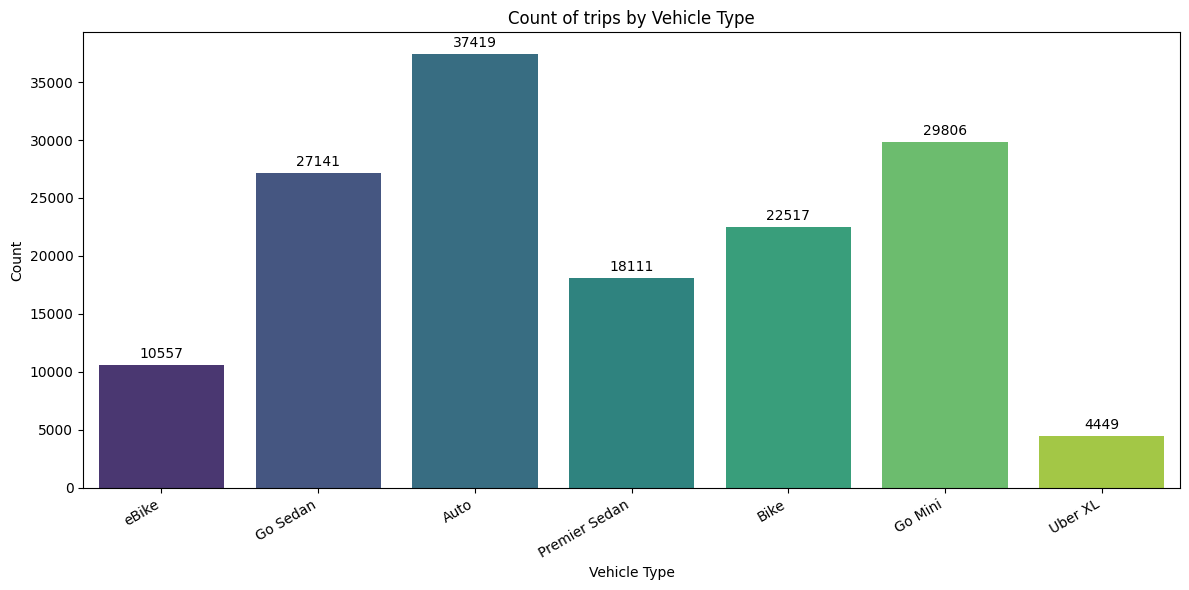

In [153]:
plt.figure(figsize=(12,6))

ax = sns.countplot(data=df, x = 'Vehicle Type', hue = 'Vehicle Type', palette='viridis')
ax.set_title("Count of trips by Vehicle Type")
ax.set_xlabel("Vehicle Type")
ax.set_ylabel("Count")

plt.xticks(rotation = 30, ha='right')

for container in ax.containers:
    ax.bar_label(container,fmt='%d',padding=3)

plt.tight_layout()
plt.show()

### Insights

- Uber Auto is the most frequently preferred vehicle type by the customers with 37419 trip records.

- Go Mini is the 2nd most preferred(29806) followed by Go Sedan(27141).

- This shows us that the preference is mostly around cheaper vehicles since alot of customers in India prefer travelling by Auto or Go Mini to save on costs. 